<a href="https://colab.research.google.com/github/krusha9441/Krush/blob/main/PSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
import os
local_zip = '/content/drive/MyDrive/Colab Notebooks/Rock-Paper-Scissors.zip'
base_dir = '/content/drive/MyDrive/Colab Notebooks/Rock-Paper-Scissors.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('/tmp')
zip_extract.close()

In [4]:
os.listdir('/tmp/Rock-Paper-Scissors')

['validation', 'test', 'train']

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

In [7]:
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 15
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/tmp/Rock-Paper-Scissors/train',
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')


val_data = val_datagen.flow_from_directory('/tmp/Rock-Paper-Scissors/validation',
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')

test_data = val_datagen.flow_from_directory('/tmp/Rock-Paper-Scissors/test',
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            batch_size=BATCH_SIZE,
                                            class_mode='categorical')




Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


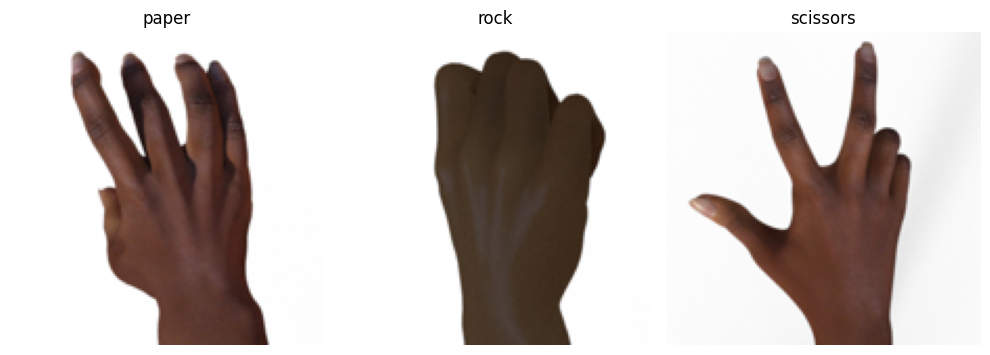

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the directory path to the training set
train_dir = '/tmp/Rock-Paper-Scissors/train/'

# Get a list of subdirectories (i.e. class labels) in the training set
class_names = sorted(os.listdir(train_dir))

# Define the number of images to display
num_images = 1

# Define the figure size and grid layout
fig, axes = plt.subplots(1, 3, figsize=(10, 10))
axes = axes.ravel()

# Loop through each class label
for i, class_name in enumerate(class_names):
    
    # Define the directory path to the current class
    class_dir = os.path.join(train_dir, class_name)
    
    # Get a list of image filenames in the current class
    image_names = os.listdir(class_dir)
    
    # Loop through a sample of image filenames in the current class
    for j, image_name in enumerate(image_names[:num_images]):
        
        # Define the file path to the current image
        image_path = os.path.join(class_dir, image_name)
        
        # Open and resize the image
        image = Image.open(image_path)
        image = image.resize((150, 150))
        
        # Display the image
        axes[i*num_images+j].imshow(image)
        axes[i*num_images+j].set_title(class_name)
        axes[i*num_images+j].axis('off')
        
# Show the figure
plt.tight_layout()
plt.show()


In [10]:

model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data,
                    epochs=15,
                    validation_data=val_data)

Epoch 1/15
79/79 [==============================] - 138s 2s/step - loss: 0.4081 - accuracy: 0.8389 - val_loss: 0.3013 - val_accuracy: 0.8788
Epoch 2/15
79/79 [==============================] - 133s 2s/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.2287 - val_accuracy: 0.9091
Epoch 3/15
79/79 [==============================] - 134s 2s/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 0.3391 - val_accuracy: 0.8485
Epoch 4/15
79/79 [==============================] - 133s 2s/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.3921 - val_accuracy: 0.8182
Epoch 5/15
79/79 [==============================] - 132s 2s/step - loss: 0.0099 - accuracy: 0.9964 - val_loss: 0.2334 - val_accuracy: 0.8788
Epoch 6/15
79/79 [==============================] - 134s 2s/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 0.1544 - val_accuracy: 0.9394
Epoch 7/15
79/79 [==============================] - 133s 2s/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0995 - val_accuracy: 0.9394
Epoch 8/15
79

In [14]:
test_loss, test_acc = model.evaluate(test_data)
print('Train accuracy:', test_acc * 100, '%')

12/12 [==============================] - 5s 447ms/step - loss: 0.8698 - accuracy: 0.8172
Train accuracy: 81.72042965888977 %


In [16]:
Validation_loss, test_acc = model.evaluate(val_data)
print('Validation accuracy:', test_acc * 100, '%')

2/2 [==============================] - 1s 30ms/step - loss: 0.6951 - accuracy: 0.8182
Validation accuracy: 81.81818127632141 %


In [13]:
train_loss, train_acc = model.evaluate(train_data)
print('Train accuracy:', train_acc * 100, '%')

79/79 [==============================] - 56s 717ms/step - loss: 6.6636e-05 - accuracy: 1.0000
Train accuracy: 100.0 %


In [17]:
model.save('D:/guddu/londonmet/2nd semester/Computer Vision/coursework/coursework/model.hdf5')

In [18]:
from keras.models import load_model
model = load_model('D:/guddu/londonmet/2nd semester/Computer Vision/coursework/coursework/model.hdf5')

In [ ]:
# task 2 visualized samples from the dataset, i.e.: rock, paper, scissors hand signs with the appropriate labels 

In [19]:
def load_data(directory):
    X = []
    y = []
    classes = ['rock', 'paper', 'scissors']
    
    for i, c in enumerate(classes):
        class_dir = os.path.join(directory, c)
        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
            img = cv2.resize(img, (100, 100))  # Resize to 100x100
            X.append(img)
            y.append(i)
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

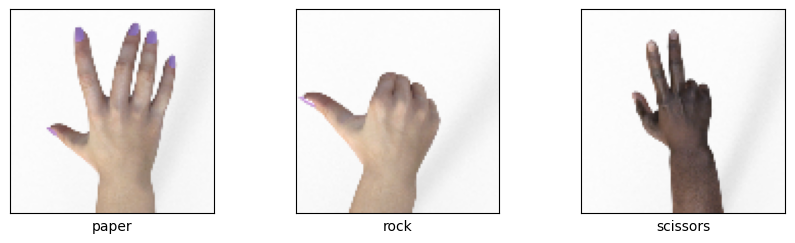

In [25]:
import cv2
import numpy as np
# Load the dataset and labels
X_train, y_train = load_data('/tmp/Rock-Paper-Scissors/train/')
classes = ['rock', 'paper', 'scissors']

# Plot a grid of 9 random samples from the training set
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, X_train.shape[0])
    img = X_train[idx]
    label = classes[y_train[idx]]
    ax.imshow(img)
    ax.set_xlabel(label)
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.show()

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [27]:
pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
pip install pydot graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


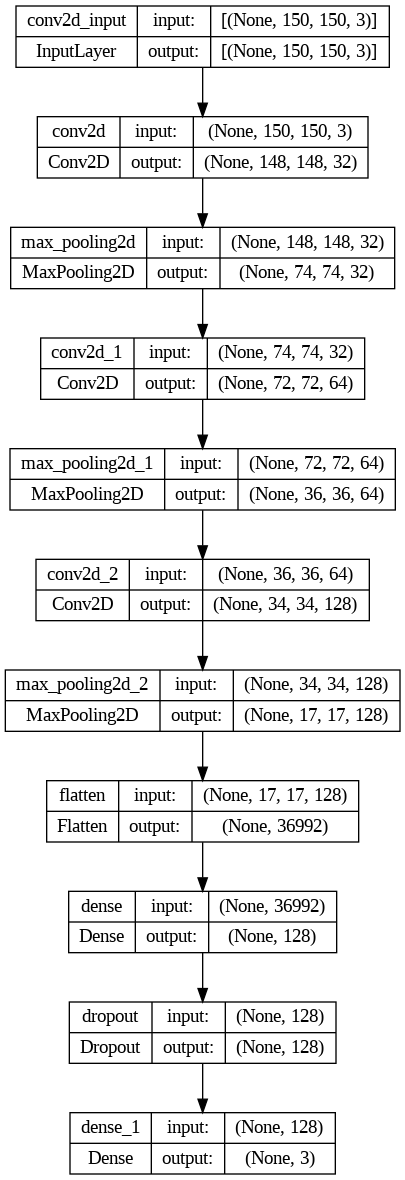

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# model accuracy evaluation plot after the training concludes

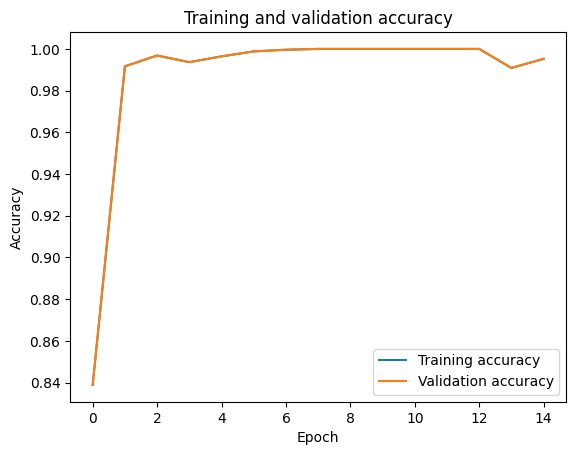

In [31]:
# Get training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['accuracy']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy curves
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# model loss evaluation plot after the training concludes 

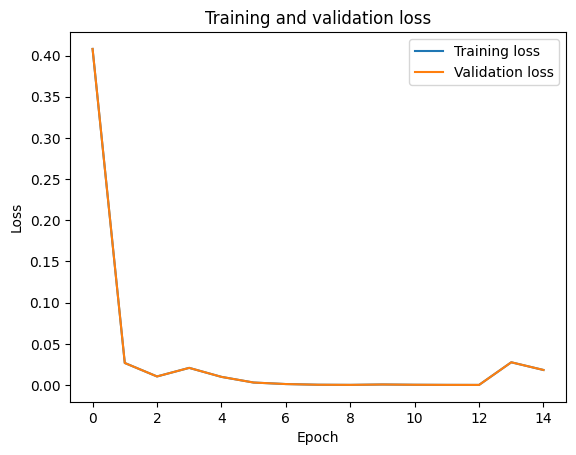

In [32]:
# Get training and validation loss
loss = history.history['loss']
val_loss = history.history['loss']

# Get number of epochs
epochs = range(len(loss))

# Plot training and validation loss curves
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# part - 2.	The second script should load the trained model and predict the hand sign in the image. It is fundamental that the script can perform the following:

a)	The tested image is to be supplied via the arguments list (5 Marks)
b)	visualisation of the supplied image with the prediction score and predicted label 

1/1 [==============================] - 0s 144ms/step
Predicted label: Scissors
Prediction score: 100.00%


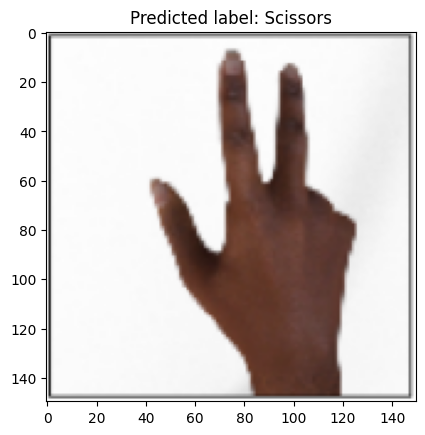

In [34]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.hdf5')

# Get the image file path from the command line arguments
img_path = sys.argv[1]

# Load the image and preprocess it
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Capture.PNG', target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

# Predict the hand sign in the image
preds = model.predict(x)
label = np.argmax(preds[0])

# Define the class labels
class_labels = ['Rock', 'Paper', 'Scissors']

# Output the predicted label and prediction score
print('Predicted label: {}'.format(class_labels[label]))
print('Prediction score: {:.2f}%'.format(preds[0][label] * 100))

# Visualize the image and prediction
plt.imshow(img)
plt.title('Predicted label: {}'.format(class_labels[label]))
plt.show()


In [ ]:
# part - 3.	The third, optional script, should be able to perform the following:

a)	Read two images of hand signs provided as script arguments (2 Marks)
b)	Predict the labels of the two images (5 Marks)
c)	Output which image won the rock, paper, scissor game (3 Marks)


In [35]:
import sys
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/model.hdf5')

# Define the class labels
class_labels = ['Rock', 'Paper', 'Scissors']

# Get the file paths of the two images from the command line arguments
img_path1 = sys.argv[1]
img_path2 = sys.argv[2]

# Load and preprocess the first image
img1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/Capture.PNG', target_size=(150, 150))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 /= 255.

# Predict the label of the first image
preds1 = model.predict(x1)
label1 = np.argmax(preds1[0])
label_str1 = class_labels[label1]

# Load and preprocess the second image
img2 = image.load_img('/content/drive/MyDrive/Colab Notebooks/Capture5.PNG', target_size=(150, 150))
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
x2 /= 255.

# Predict the label of the second image
preds2 = model.predict(x2)
label2 = np.argmax(preds2[0])
label_str2 = class_labels[label2]

# Output the predicted labels for the images
print('Image 1: {} (Prediction score: {:.2f}%)'.format(label_str1, preds1[0][label1] * 100))
print('Image 2: {} (Prediction score: {:.2f}%)'.format(label_str2, preds2[0][label2] * 100))

# Determine the winner of the rock, paper, scissors game
if label1 == label2:
    print('Tie! Both images show the same hand sign.')
elif label1 == 0 and label2 == 1 or label1 == 1 and label2 == 2 or label1 == 2 and label2 == 0:
    print('Image 2 wins! {} beats {}.'.format(label_str2, label_str1))
else:
    print('Image 1 wins! {} beats {}.'.format(label_str1, label_str2))

1/1 [==============================] - 0s 33ms/step
Image 1: Scissors (Prediction score: 100.00%)
Image 2: Paper (Prediction score: 100.00%)
Image 1 wins! Scissors beats Paper.
